# Implementation of Linear Regression


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Loading the Continuous numeric dataset into a DataFrame

In [2]:
# Loading the Continuous numeric dataset into a DataFrame
data = pd.read_csv('data_for_lr.csv')

# Data Exploration

## Checking the Dataset content
two columns. X is the independent Variable. Y is Dependent variable (Label)

In [3]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


## Checking the Shape. Total Rows and Columns in the dataset

In [4]:
data.shape

(700, 2)

 ## Summary or Overview of the DataFrame. This includes the number of entries, column names, non-null counts, and data types of each column

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


# Describing the Statis tical information of the Numerical Dataset

In [6]:
data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


# Data Cleaning

## Checking the Missing values

In [7]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [8]:
data[data.isnull().any(axis=1)]

,x,y
213,3530.157369,NaN


## Deleting the Rows having Missing values. since its only one row having the Null value - NaN

In [9]:
data_cleaned= data.dropna()

## Verifying for missing values after cleaning

In [10]:
data_cleaned[data_cleaned.isnull().any(axis=1)]

,x,y


# Storing the Dependent and Independent variables in separate Dataframes  before splitting for Machine Learning

In [11]:

X = data_cleaned.drop('y', axis=1)
Y = data_cleaned['y']
# checking the first few rows of the Dependent variables
Y.head()

0    21.549452
1    47.464463
2    17.218656
3    36.586398
4    87.288984
Name: y, dtype: float64

## Checking the first few rows of the Independent variables

In [12]:
X.head()

,x
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0


# Split the data into training and testing datasets for Machine Learning

In [13]:
# Split the data into training and testing datasets for Machine Learning
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Creating a Linear Regression model and Training the model using the training dataset

In [14]:

model = LinearRegression()

# Training the model using the training data
model.fit(X_train, Y_train)


LinearRegression()

## Predicting the model using the Testing dataset

In [15]:
# Predicting the test dataset results
Y_pred = model.predict(X_test)


## Calculating the Performance metrics of the trained Linear regression model
What is a good MSE value for regression?<br/>
MSE will never be negative since the errors are squared. The value of the error ranges from zero to infinity. MSE increases exponentially with an increase in error. A good model will have an MSE value closer to zero, indicating a better goodness of fit to the data
<br/>

R Squared, indicating the extent of influence a specific independent variable exerts on the dependent variable. Typically ranging between 0 and 1, values below 0.3 suggest weak influence, while those between 0.3 and 0.5 indicate moderate influence

In [16]:

# Calculating the performance metrics of the trained model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 7.752986666319193
R-squared: 0.9910998765243975


##Interpretation of the Results
###Mean Squared Error (MSE)
Value: 7.752986666319193
Meaning: MSE measures the average squared difference between the actual and predicted values. A lower MSE indicates that the trained model's predictions are closer to the actual values. In this case, an MSE of approximately 7.75 suggests that, on average, the squared differences between the actual and predicted values are relatively low. However, the acceptability of this value depends on the scale of the target variable.

###R-squared (R²)
Value: 0.9910998765243975
Meaning: R² represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). An R² value of 0.9911 indicates that 99.11% of the variance in the target variable (Y) is explained by the model. This is an excellent value, suggesting that the model fits the data very well.

##Conclusion of the Prediction

#The Prediction results indicate that the trained linear regression model is performing exceptionally well:<br/>

#1) The low MSE indicates that the model's predictions are quite close to the actual values.<br/>
#2) The high R² value indicates that the model explains almost all the variability of the response data around its mean.

#CHECKNG THE ASSUMPTIONS
#1. Linearity: Test vs Train vs Predicted Values

# Ploting the Training data, Test Data and the Regression Line using the Predited data to viusally prove the Closeness of the Predicted Results

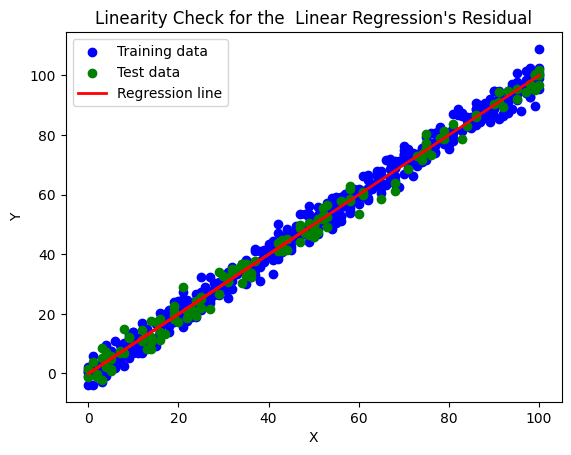

In [38]:
# Ploting the training data
plt.scatter(X_train, Y_train, color='blue', label='Training data')
# Ploting  the test data
plt.scatter(X_test, Y_test, color='green', label='Test data')
# Ploting  the regression line for the "data_for_lr.csv" dataset
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Regression line')

plt.title("Linearity Check for the  Linear Regression's Residual")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


#CHECKNG THE ASSUMPTIONS
# 1. Linearity(second method): Observed vs Predicted Values

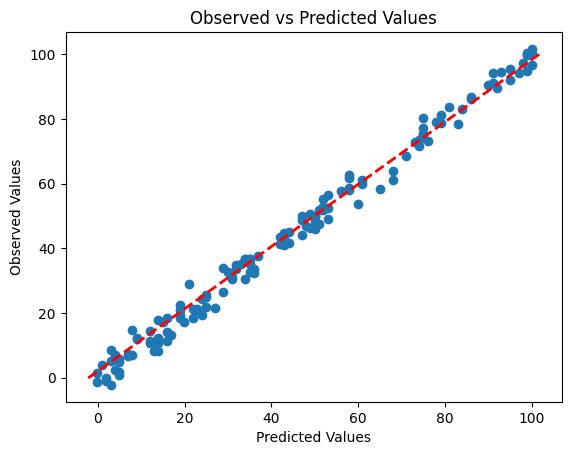

In [21]:
# 1. Linearity: Observed vs Predicted Values
plt.scatter(Y_pred, Y_test)
plt.plot([Y_test.min(),Y_test.max()],[Y_pred.min(),Y_pred.max()],color='red' , linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.title('Observed vs Predicted Values')
plt.show()

#2. Checking Residuals for INDEPENDENCE i.e., Random Distribution:


Ploting the residuals to ensure they are randomly distributed. This  helps to verify that the trained model's assumptions hold true (linearity, homoscedasticity, independence, and normality of residuals).

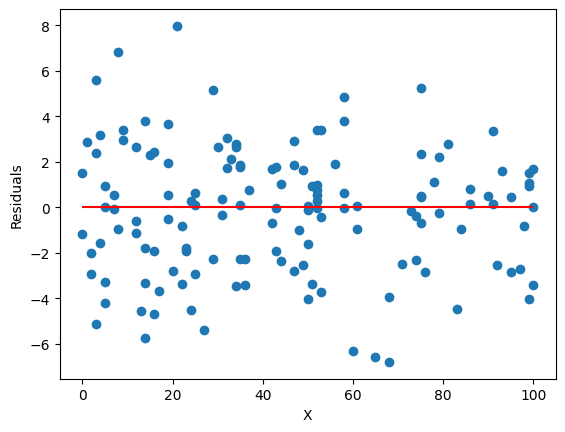

In [33]:
# 2. Residual Independence and Homoscedasticity: Residuals vs Predicted Values
import matplotlib.pyplot as plt

residuals = Y_test - Y_pred
plt.scatter(X_test, residuals)
plt.hlines(y=0, xmin=X_test.min(), xmax=X_test.max(), colors='red')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()


#3. Normality Check: QQ plot of residuals.

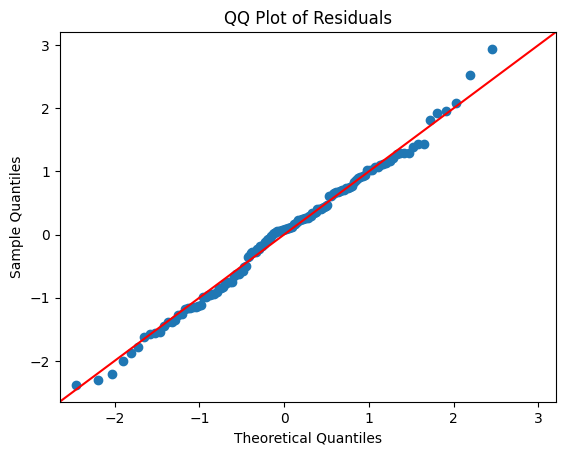

In [35]:
# 3. QQ Plot for Normality of Residuals
import statsmodels.api as sm
import scipy.stats as stats
# Creating the Q-Q plot
sm.qqplot(residuals, line='45', fit=True,dist=stats.norm)
# sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()
# The sm.qqplot function with line='45', fit=True, and dist=stats.norm is
#indeed a robust way to generate a Q-Q plot for assessing the normality of residual

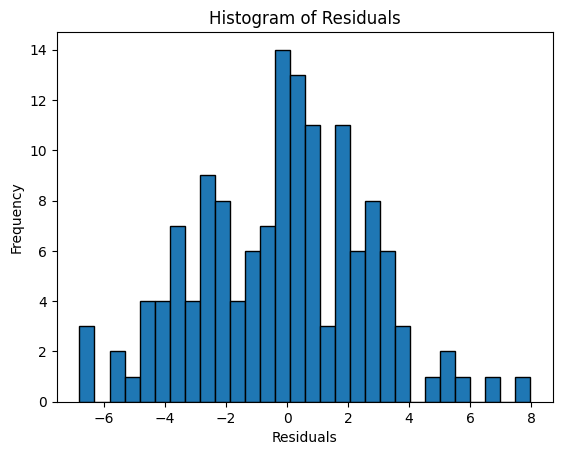

In [39]:
# Histogram of residuals
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#4.  Statistical Tests

In [29]:
# 4. Statistical Tests
# Adding a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(Y_train, X_train_sm).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 5.790e+04
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:10:41   Log-Likelihood:                -1370.8
No. Observations:                 559   AIC:                             2746.
Df Residuals:                     557   BIC:                             2754.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0966      0.245     -0.395      0.6

Model Summary

    Dep. Variable: y: This is the dependent variable (target variable) in your model.
    R-squared: 0.990: This indicates that 99% of the variance in the dependent variable is explained by the model. A high R-squared value suggests a good fit.
    Adj. R-squared: 0.990: This is the adjusted R-squared, which accounts for the number of predictors in the model. It’s also very high, reinforcing the model's good fit.
    F-statistic: 5.790e+04: The F-statistic tests the overall significance of the model. A very high F-statistic value indicates that the model is statistically significant.
    Prob (F-statistic): 0.00: The p-value for the F-statistic is essentially zero, indicating that the model is statistically significant.

Regression Coefficients

    const: This is the intercept of the model.
        coef: -0.0966: The estimated coefficient for the intercept.
        std err: 0.245: The standard error of the intercept.
        t: -0.395: The t-statistic for the intercept.
        P>|t|: 0.693: The p-value for the intercept. A high p-value (greater than 0.05) suggests that the intercept is not statistically significant.

    x: This represents the independent variable (predictor).
        coef: 1.0012: The estimated coefficient for the predictor, indicating the average change in the dependent variable for a one-unit change in the predictor.
        std err: 0.004: The standard error of the coefficient.
        t: 240.628: The t-statistic for the predictor, which is very high, indicating a strong relationship.
        P>|t|: 0.000: The p-value for the predictor, which is essentially zero, indicating that the predictor is statistically significant.
        [0.025, 0.975]: [0.993, 1.009]: This is the 95% confidence interval for the predictor's coefficient, suggesting that the true coefficient is between 0.993 and 1.009.

Diagnostic Tests

    Omnibus: 0.165: A test for skewness and kurtosis. A low value indicates that the residuals are normally distributed.
    Prob(Omnibus): 0.921: The p-value associated with the Omnibus test. A high p-value suggests that we cannot reject the null hypothesis that the residuals are normally distributed.
    Durbin-Watson: 2.008: A test for autocorrelation in the residuals. Values near 2 indicate no autocorrelation.
    Jarque-Bera (JB): 0.194: Another test for normality of residuals. A low value supports the normality assumption.
    Prob(JB): 0.908: The p-value associated with the Jarque-Bera test. A high p-value suggests that we cannot reject the null hypothesis that the residuals are normally distributed.
    Skew: 0.041: The skewness of the residuals. Values close to 0 indicate symmetry.
    Kurtosis: 2.961: The kurtosis of the residuals. A value close to 3 indicates normality.
    Cond. No.: 121: The condition number, which tests for multicollinearity. A value below 30 suggests little to no multicollinearity.

Summary Interpretation

    Model Fit: The model fits the data very well, as indicated by the R-squared and adjusted R-squared values close to 1.
    Statistical Significance: The predictor variable x is highly statistically significant (p-value is essentially zero).
    Intercept: The intercept is not statistically significant (p-value is 0.693), which may or may not be a concern depending on the context of the model.
    Assumptions Checking:
        Normality: The residuals appear to be normally distributed (supported by Omnibus, Jarque-Bera, skewness, and kurtosis tests).
        Autocorrelation: There is no significant autocorrelation in the residuals (Durbin-Watson value close to 2).
        Multicollinearity: There is no indication of multicollinearity issues (condition number is within acceptable range).

Overall, the provided OLS regression model summary suggests that the model is a good fit for the data, the predictor variable is highly significant, and the assumptions underlying linear regression are reasonably met.


##Note that Classification Report is not supoorted for continuous vaiable

#Cross-Validation:
Performing the  cross-validation to ensure that the trained model generalizes well to unseen data.

##Function:
cross_val_score() performs cross-validation by splitting the data into multiple folds, training the model on each fold, and evaluating it on the corresponding validation set. It returns an array of scores obtained from each cross-validation fold.<br/>
##Usage:
It is used to estimate the model's performance more robustly by averaging the scores from multiple train-test splits.
## Purpose:
Provides a more reliable estimate of the model's performance by mitigating the variability that can occur from a single train-test split. This is particularly useful when the dataset is small or when the model's performance is sensitive to the specific train-test split.

In [19]:
from sklearn.model_selection import cross_val_score

cv_mse = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=5)
cv_r2 = cross_val_score(model, X, Y, scoring='r2', cv=5)

print(f'Cross-Validated MSE: {-cv_mse.mean()}')
print(f'Cross-Validated R-squared: {cv_r2.mean()}')


Cross-Validated MSE: 7.953831094463889
Cross-Validated R-squared: 0.9903764720252457


##mean_squared_error():
Use it to evaluate the performance on a specific test set.<br/>
##cross_val_score():
Use it to perform cross-validation and get a more reliable estimate of the model's performance by averaging the scores from multiple folds.
<br/><br/>
By using both functions, we can get a comprehensive view of your model's performance: a specific measure on a test set with mean_squared_error(), and a more generalizable estimate with cross_val_score().
##Key Differences between mean_squared_error()  and cross_val_score()

##Scope:
mean_squared_error(): Measures performance on a single test set. <br/>
cross_val_score(): Measures performance across multiple train-test splits (folds).

##Output:
mean_squared_error(): Returns a single MSE value.<br/>
cross_val_score(): Returns an array of scores (one for each fold), which can be averaged to get a mean performance score.

##Robustness:
mean_squared_error(): The result can be sensitive to the particular train-test split.<br/>
cross_val_score(): Provides a more robust estimate by considering multiple splits.

##Usage in Cross-Validation:
mean_squared_error(): Typically used for evaluating the final model on a hold-out test set after the model has been tuned and validated.<br/>
cross_val_score(): Used during model development and tuning to assess the generalization performance of the model.


